File to determine the average number of counts our ROIs in each energy bin.

In [1]:
import sys
import shutil
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import *
from plot_skylocs import LimitPlot
from astropy.cosmology import Planck15
import corner

sys.path.append('/tigress/smsharma/Fermi-NPTF-exposure/')
import fermi.fermi_plugin as fp
from NPTFit import create_mask as cm # module for creating the mask

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
maps_dir='/tigress/smsharma/public/CTBCORE/'
fermi_data_dir='/tigress/smsharma/public/FermiData/'
work_dir = '/tigress/nrodd/DM-Catalog-Scan/'
f_global = fp.fermi_plugin(maps_dir, fermi_data_dir=fermi_data_dir, work_dir=work_dir, 
                           CTB_en_min=0, CTB_en_max=40, nside=128, eventclass=5, 
                           eventtype=0, newstyle=1, data_July16=True)

In [16]:
randlocs = 100

rand10 = np.zeros(40)
rand2 = np.zeros(40)

flux10 = np.zeros(40)
flux2 = np.zeros(40)

for ebin in range(40):
    data = f_global.CTB_count_maps[ebin]
    flux = data/f_global.CTB_exposure_maps[ebin]
    
    for ri in range(randlocs):
        badval = True
        while (badval):
            test_ell = np.random.uniform(0.,2*np.pi)
            test_b = np.arccos(np.random.uniform(-1.,1.))-np.pi/2.

            # Check if not masked with plane
            if ( (np.abs(test_b)*180./np.pi > 20. )):
                badval = False
                l = test_ell*180./np.pi
                b = test_b*180./np.pi
                
        analysis_mask_10 = cm.make_mask_total(mask_ring = True, inner = 0, outer = 10, ring_b = b, ring_l = l)
        roi_10 = np.where(analysis_mask_10 == 0)[0]
        analysis_mask_2 = cm.make_mask_total(mask_ring = True, inner = 0, outer = 2, ring_b = b, ring_l = l)
        roi_2 = np.where(analysis_mask_2 == 0)[0]
        
        rand10[ebin] += np.sum(data[roi_10])/float(randlocs)
        rand2[ebin] += np.sum(data[roi_2])/float(randlocs)

        flux10[ebin] += np.sum(flux[roi_10])/float(randlocs)
        flux2[ebin] += np.sum(flux[roi_2])/float(randlocs)


    print "----------------------------"
    print "Ebin:",ebin
    print "Mean counts 10, 2:",rand10[ebin],rand2[ebin]
    print "Mean flux 10, 2:",flux10[ebin],flux2[ebin]

----------------------------
Ebin: 0
Mean counts 10, 2: 37469.98 1511.26
Mean flux 10, 2: 3.4368777051e-07 1.38386968596e-08
----------------------------
Ebin: 1
Mean counts 10, 2: 29417.1 1139.66
Mean flux 10, 2: 2.43812980472e-07 9.49626751012e-09
----------------------------
Ebin: 2
Mean counts 10, 2: 26584.66 1012.04
Mean flux 10, 2: 1.8921797718e-07 7.23380045642e-09
----------------------------
Ebin: 3
Mean counts 10, 2: 23032.74 889.08
Mean flux 10, 2: 1.42878429656e-07 5.5401052812e-09
----------------------------
Ebin: 4
Mean counts 10, 2: 21309.58 830.08
Mean flux 10, 2: 1.20122466143e-07 4.68810235965e-09
----------------------------
Ebin: 5
Mean counts 10, 2: 17526.1 681.54
Mean flux 10, 2: 9.14418279407e-08 3.56411972491e-09
----------------------------
Ebin: 6
Mean counts 10, 2: 13955.04 550.96
Mean flux 10, 2: 6.74154667024e-08 2.68034538453e-09
----------------------------
Ebin: 7
Mean counts 10, 2: 11618.58 503.46
Mean flux 10, 2: 5.07871959599e-08 2.16793472951e-09
--

In [17]:
for ebin in range(40):
    data = f_global.CTB_count_maps[ebin]
    exp = f_global.CTB_exposure_maps[ebin]
    flux = data/exp
    
    print "ebin:",ebin
    print "mean data, exp, flux:", np.mean(data), np.mean(exp), np.mean(flux)

ebin: 0
mean data, exp, flux: 50.9514 1.09618e+11 4.52772e-10
ebin: 1
mean data, exp, flux: 47.2869 1.24802e+11 3.68882e-10
ebin: 2
mean data, exp, flux: 43.8362 1.42415e+11 2.99553e-10
ebin: 3
mean data, exp, flux: 39.9072 1.60361e+11 2.42176e-10
ebin: 4
mean data, exp, flux: 35.2268 1.77825e+11 1.92813e-10
ebin: 5
mean data, exp, flux: 29.9883 1.94979e+11 1.49732e-10
ebin: 6
mean data, exp, flux: 24.7411 2.0979e+11 1.14864e-10
ebin: 7
mean data, exp, flux: 20.4036 2.3073e+11 8.61763e-11
ebin: 8
mean data, exp, flux: 15.9209 2.43847e+11 6.37178e-11
ebin: 9
mean data, exp, flux: 11.8258 2.54268e+11 4.54112e-11
ebin: 10
mean data, exp, flux: 8.76493 2.59051e+11 3.30385e-11
ebin: 11
mean data, exp, flux: 6.42028 2.6023e+11 2.40829e-11
ebin: 12
mean data, exp, flux: 4.61287 2.59943e+11 1.73218e-11
ebin: 13
mean data, exp, flux: 3.24627 2.56039e+11 1.23687e-11
ebin: 14
mean data, exp, flux: 2.2528 2.53491e+11 8.67103e-12
ebin: 15
mean data, exp, flux: 1.59983 2.5559e+11 6.10856e-12
ebin: 1

In [18]:
for ebin in range(40):
    data = f_global.CTB_count_maps[ebin]
    
    print "ebin:",ebin, "counts:",np.sum(data)

ebin: 0 counts: 1.00175e+07
ebin: 1 counts: 9.29698e+06
ebin: 2 counts: 8.61855e+06
ebin: 3 counts: 7.84608e+06
ebin: 4 counts: 6.92587e+06
ebin: 5 counts: 5.89594e+06
ebin: 6 counts: 4.86431e+06
ebin: 7 counts: 4.0115e+06
ebin: 8 counts: 3.13018e+06
ebin: 9 counts: 2.32505e+06
ebin: 10 counts: 1.72326e+06
ebin: 11 counts: 1.26228e+06
ebin: 12 counts: 906928.0
ebin: 13 counts: 638242.0
ebin: 14 counts: 442918.0
ebin: 15 counts: 314540.0
ebin: 16 counts: 218054.0
ebin: 17 counts: 152308.0
ebin: 18 counts: 105636.0
ebin: 19 counts: 73904.0
ebin: 20 counts: 51470.0
ebin: 21 counts: 37314.0
ebin: 22 counts: 26474.0
ebin: 23 counts: 18828.0
ebin: 24 counts: 13604.0
ebin: 25 counts: 9434.0
ebin: 26 counts: 6844.0
ebin: 27 counts: 4672.0
ebin: 28 counts: 3394.0
ebin: 29 counts: 2150.0
ebin: 30 counts: 1486.0
ebin: 31 counts: 1058.0
ebin: 32 counts: 758.0
ebin: 33 counts: 444.0
ebin: 34 counts: 360.0
ebin: 35 counts: 270.0
ebin: 36 counts: 160.0
ebin: 37 counts: 126.0
ebin: 38 counts: 78.0
ebi

In [22]:
data_dir = "../data/Tully/"

ivals = np.load(data_dir + 'LL_inten_o6_data.npz')['intens']

for ebin in range(40):
    print "ebin:",ebin, "0 intensity:",ivals[ebin][0]

ebin: 0 0 intensity: 7.03805926293e-18
ebin: 1 0 intensity: 6.23928591214e-18
ebin: 2 0 intensity: 5.50768605961e-18
ebin: 3 0 intensity: 4.92748829478e-18
ebin: 4 0 intensity: 4.47527118549e-18
ebin: 5 0 intensity: 4.10699962992e-18
ebin: 6 0 intensity: 3.83953500063e-18
ebin: 7 0 intensity: 3.51831658923e-18
ebin: 8 0 intensity: 3.36271216402e-18
ebin: 9 0 intensity: 3.24308535722e-18
ebin: 10 0 intensity: 3.18217828933e-18
ebin: 11 0 intensity: 3.16039056713e-18
ebin: 12 0 intensity: 3.16029340104e-18
ebin: 13 0 intensity: 3.189759718e-18
ebin: 14 0 intensity: 3.21539726259e-18
ebin: 15 0 intensity: 3.1758763592e-18
ebin: 16 0 intensity: 3.18280235025e-18
ebin: 17 0 intensity: 3.17677675843e-18
ebin: 18 0 intensity: 3.1823528164e-18
ebin: 19 0 intensity: 3.19557602936e-18
ebin: 20 0 intensity: 3.19412124335e-18
ebin: 21 0 intensity: 3.18798323898e-18
ebin: 22 0 intensity: 3.16825369292e-18
ebin: 23 0 intensity: 3.17151196247e-18
ebin: 24 0 intensity: 3.18842175316e-18
ebin: 25 0 int

In [21]:
print np.shape(ivals)

(40, 200)


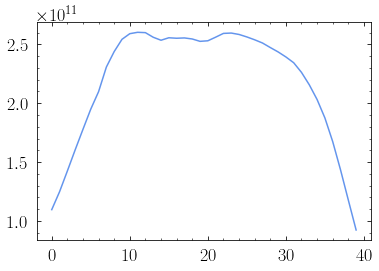

In [6]:
expplot = np.zeros(40)

for ebin in range(40):
    exp = f_global.CTB_exposure_maps[ebin]
    expplot[ebin] = np.mean(exp)

plt.plot(range(40),expplot)